In [27]:
# librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

### Extracción del Archivo Tratado

In [28]:
datos = pd.read_csv('datos_limpios.csv') # cargar el dataset de los datos limpios del challenge anterior
datos.head() # mostrar las primeras 5 filas

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Daily_Accounts
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


### Eliminación de Columnas Irrelevantes

##### Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [29]:
# eliminar el customerID y Daily_Accounts, dado que no representan un gran valor en el análisis
datos.drop(columns=['customerID', 'Daily_Accounts'], inplace=True)
datos.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0.0,Female,0,1,1,9,1,0.0,DSL,No,Yes,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3
1,0.0,Male,0,0,0,9,1,1.0,DSL,No,No,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4
2,1.0,Male,0,0,0,4,1,0.0,Fiber optic,No,No,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85
3,1.0,Male,1,1,0,13,1,0.0,Fiber optic,No,Yes,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85
4,1.0,Female,1,1,0,3,1,0.0,Fiber optic,No,No,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4


In [30]:
datos.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

### Encoding
##### Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [31]:
# identificar las columnas categóricas que se quieren codificar
columnas_categoricas = [
    'customer_gender',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'account_Contract',
    'account_PaymentMethod',
]

# aplicar el one-hot encoding, usando drop_first=True para evitar colinealidad
df_dumies = pd.get_dummies(datos[columnas_categoricas], drop_first=True)

# concatenar los "dummies" al resto de las variables categóricas
datos_preprocesados = pd.concat([
    datos.drop(columns=columnas_categoricas),
    df_dumies
], axis=1)

datos_preprocesados

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,...,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,internet_OnlineBackup_No internet service,internet_OnlineBackup_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,1.0,...,False,False,False,False,True,True,False,False,False,True
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0.0,1.0,0.0,1.0,...,False,False,False,False,True,False,False,False,True,False
4,1.0,1,1,0,3,1,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,13,1,0.0,0.0,1.0,0.0,...,False,False,True,False,False,True,False,False,False,True
7263,1.0,0,1,0,22,1,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
7264,0.0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,True
7265,0.0,0,1,1,67,1,0.0,1.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,True


In [32]:
# convertir los datos booleanos a enteros, logrando que todas las columnas tengan datos numéricos
datos_preprocesados = datos_preprocesados.astype(int, errors='ignore')
datos_preprocesados

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,...,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,internet_OnlineBackup_No internet service,internet_OnlineBackup_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,1
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,4,1,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1,1,0,13,1,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,1,1,0,3,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,13,1,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
7263,1.0,0,1,0,22,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7264,0.0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
7265,0.0,0,1,1,67,1,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,1


In [33]:
datos_original = datos.copy()
datos = datos_preprocesados
datos

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,...,internet_InternetService_No,internet_OnlineSecurity_No internet service,internet_OnlineSecurity_Yes,internet_OnlineBackup_No internet service,internet_OnlineBackup_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,0,0,0,1
1,0.0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,4,1,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1,1,0,13,1,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,1,1,0,3,1,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,0,0,0,13,1,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
7263,1.0,0,1,0,22,1,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7264,0.0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
7265,0.0,0,1,1,67,1,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,0,0,1


### Verificación de la Proporción de Cancelación (Churn)
##### Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.



In [34]:
datos['Churn'].value_counts(normalize=True)

Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

### Balanceo de Clases (opcional)
##### Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.



In [35]:
# completar los valores NAN
datos['Churn'].isnull().sum() # verificar cuantos NaN hay

np.int64(224)

In [36]:
datos = datos.dropna(subset='Churn') # limpiar los Nan de la columna churn

In [37]:
# crear las variables predictorias y las variables de respuesta
X = datos.drop(columns='Churn')
y = datos['Churn']

In [38]:
X.select_dtypes(include='object').columns # extraer las columnas de tipo string, estas generan problemas mas adelante

Index(['account_Charges.Total'], dtype='object')

In [39]:
# convertir la columna a int
X['account_Charges.Total'] = pd.to_numeric(X['account_Charges.Total'], errors='coerce')

In [40]:
X = X.fillna(X.mean(numeric_only=True)) # rellenar los Nans

In [41]:
# crear las variables de entrenamiento y testep
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y, 
    random_state=42
)

# crear una instancia de la clase SMOTE
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train) # aplicar el SMOTE y resamplear los datos

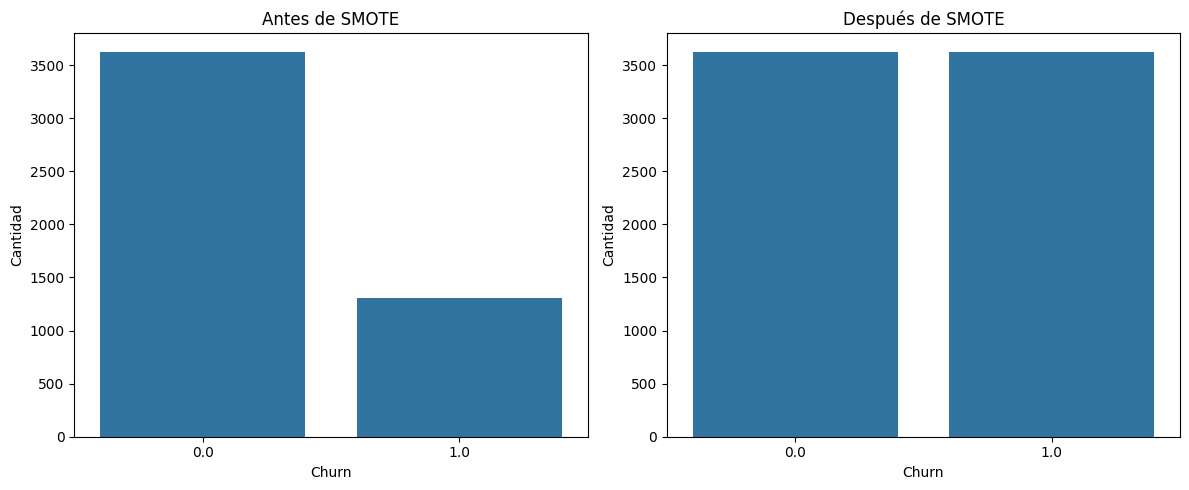

In [45]:
# crear una visualización para verificar el balanceo de las clases
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# antes 
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Antes de SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Cantidad")

# despues
sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title("Después de SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()